<a href="https://colab.research.google.com/github/melhamdani/-Stamp-Prices/blob/main/Project_3_SQL_1_Chinook_project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-3_SQL - Chinook


### *Deep Dive Coding Data Science Bootcamp Project*

## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [4]:
 #Install the sqlite package for Ubuntu
#Download the Chinook sqlite database

%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [5]:
!sqlite3 --help

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [6]:

%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [7]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [8]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Oct 29 02:23 .
drwxr-xr-x 1 root root   4096 Oct 29 02:20 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 02:23 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 25 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 25 13:20 sample_data


In [9]:
#!sqlite3 chinook.db


In [10]:
# Get a list of the tables in the database
%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [11]:
# Show the schema for the entire database
%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)


In [12]:
# RETURN all employee info

%%script sqlite3 --column --header chinook.db
select *
from employees
;

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [13]:

%%script sqlite3 --column --header chinook.db
select *
from customers

CustomerId  FirstName  LastName      Company                                           Address                                   City                 State   Country         PostalCode  Phone                Fax                 Email                          SupportRepId
----------  ---------  ------------  ------------------------------------------------  ----------------------------------------  -------------------  ------  --------------  ----------  -------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves     Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170           São José dos Campos  SP      Brazil          12227-000   +55 (12) 3923-5555   +55 (12) 3923-5566  luisg@embraer.com.br           3           
2           Leonie     Köhler                                                          Theodor-Heuss-Straße 34                   Stuttgart                    Germany         70174       +

In [14]:
# RETURN all employee info from only the specific column names 'EmployeeID..'

%%script sqlite3 --column --header chinook.db

select EmployeeId, LastName, FirstName, Title, ReportsTo
from employees

EmployeeId  LastName  FirstName  Title                ReportsTo
----------  --------  ---------  -------------------  ---------
1           Adams     Andrew     General Manager               
2           Edwards   Nancy      Sales Manager        1        
3           Peacock   Jane       Sales Support Agent  2        
4           Park      Margaret   Sales Support Agent  2        
5           Johnson   Steve      Sales Support Agent  2        
6           Mitchell  Michael    IT Manager           1        
7           King      Robert     IT Staff             6        
8           Callahan  Laura      IT Staff             6        


In [15]:
# RETURN all customer info from only the specific column names 'CustomerID...'

%%script sqlite3 --column --header chinook.db
select CustomerID, FirstName, LastName, SupportRepID
from customers

CustomerId  FirstName  LastName      SupportRepId
----------  ---------  ------------  ------------
1           Luís       Gonçalves     3           
2           Leonie     Köhler        5           
3           François   Tremblay      3           
4           Bjørn      Hansen        4           
5           František  Wichterlová   4           
6           Helena     Holý          5           
7           Astrid     Gruber        5           
8           Daan       Peeters       4           
9           Kara       Nielsen       4           
10          Eduardo    Martins       4           
11          Alexandre  Rocha         5           
12          Roberto    Almeida       3           
13          Fernanda   Ramos         4           
14          Mark       Philips       5           
15          Jennifer   Peterson      3           
16          Frank      Harris        4           
17          Jack       Smith         5           
18          Michelle   Brooks        3           


#### WHERE


In [16]:

%%script sqlite3 --column --header chinook.db
SELECT * FROM customers
WHERE SupportRepID = '4';

CustomerId  FirstName  LastName     Company           Address                                   City           State  Country         PostalCode  Phone                Fax                 Email                        SupportRepId
----------  ---------  -----------  ----------------  ----------------------------------------  -------------  -----  --------------  ----------  -------------------  ------------------  ---------------------------  ------------
4           Bjørn      Hansen                         Ullevålsveien 14                          Oslo                  Norway          0171        +47 22 44 22 22                          bjorn.hansen@yahoo.no        4           
5           František  Wichterlová  JetBrains s.r.o.  Klanova 9/506                             Prague                Czech Republic  14700       +420 2 4172 5555     +420 2 4172 5555    frantisekw@jetbrains.com     4           
8           Daan       Peeters                        Grétrystraat 63               

#### AND


In [17]:
#RETURN list of all customers from Denmark and have SupportRep 4

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE country = 'Denmark'
AND supportrepid= '4';

CustomerId  FirstName  LastName  Company  Address              City        State  Country  PostalCode  Phone           Fax  Email                  SupportRepId
----------  ---------  --------  -------  -------------------  ----------  -----  -------  ----------  --------------  ---  ---------------------  ------------
9           Kara       Nielsen            Sønder Boulevard 51  Copenhagen         Denmark  1720        +453 3331 9991       kara.nielsen@jubii.dk  4           


#### OR


In [18]:
#RETURN list of all customers from Brussels or from Buenos Aires

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE city = 'Brussels'
OR city= 'Buenos Aires';

CustomerId  FirstName  LastName   Company  Address             City          State  Country    PostalCode  Phone                Fax  Email                     SupportRepId
----------  ---------  ---------  -------  ------------------  ------------  -----  ---------  ----------  -------------------  ---  ------------------------  ------------
8           Daan       Peeters             Grétrystraat 63     Brussels             Belgium    1000        +32 02 219 03 03          daan_peeters@apple.be     4           
56          Diego      Gutiérrez           307 Macacha Güemes  Buenos Aires         Argentina  1106        +54 (0)11 4311 4333       diego.gutierrez@yahoo.ar  4           


#### LIKE (with % or _ wildcard)


In [19]:
#RETURN all info from customers whose last names end with 'a'

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE lastname LIKE '%a';

CustomerId  FirstName  LastName    Company               Address             City            State  Country  PostalCode  Phone               Fax                 Email                          SupportRepId
----------  ---------  ----------  --------------------  ------------------  --------------  -----  -------  ----------  ------------------  ------------------  -----------------------------  ------------
11          Alexandre  Rocha       Banco do Brasil S.A.  Av. Paulista, 2022  São Paulo       SP     Brazil   01310-200   +55 (11) 3055-3278  +55 (11) 3055-8131  alero@uol.com.br               5           
12          Roberto    Almeida     Riotur                Praça Pio X, 119    Rio de Janeiro  RJ     Brazil   20040-020   +55 (21) 2271-7000  +55 (21) 2271-7070  roberto.almeida@riotur.gov.br  3           
59          Puja       Srivastava                        3,Raj Bhavan Road   Bangalore              India    560001      +91 080 22289999                        puja_srivastava@yah

#### BETWEEN


In [20]:
#RETURN all info from invoices generated between Jan 1, 2013 and April 30, 2013

%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
WHERE invoicedate BETWEEN '2013-01-01' AND '2013-04-30';

InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity     BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  --------------  ------------  --------------  -----------------  -----
333        30          2013-01-02 00:00:00  230 Elgin Street                          Ottawa          ON            Canada          K2P 1L7            8.91 
334        39          2013-01-07 00:00:00  4, Rue Milton                             Paris                         France          75009              13.86
335        53          2013-01-15 00:00:00  113 Lupus St                              London                        United Kingdom  SW1V 3EN           0.99 
336        54          2013-01-28 00:00:00  110 Raeburn Pl                            Edinburgh                     United Kingdom  EH4 1HH            1.98 
337        56          2013-01-28 00:00:00  307 Macacha Gü

#### LIMIT



In [21]:
#RETURN all info on first 5 genres

%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
LIMIT 5;

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     


### Sorting and Grouping


#### ORDER BY


In [22]:
#RETURN all data from table 'invoices' in sorted by the values in 'total' column

%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
ORDER BY total


InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----
6          37          2009-01-19 00:00:00  Berger Straße 10                          Frankfurt                          Germany         60316              0.99 
13         16          2009-02-19 00:00:00  1600 Amphitheatre Parkway                 Mountain View        CA            USA             94043-1351         0.99 
20         54          2009-03-22 00:00:00  110 Raeburn Pl                            Edinburgh                          United Kingdom  EH4 1HH            0.99 
27         33          2009-04-22 00:00:00  5112 48 Street                            Yellowknife          NT            Canada          X1A 1N6            0.99 
34         12          2009-

#### DISTINCT


In [23]:
#Get a list of 10 unique composer names without duplicates

%%script sqlite3 --column --header chinook.db
select distinct Composer
from tracks
Limit 10
;

Composer                                                              
----------------------------------------------------------------------
Angus Young, Malcolm Young, Brian Johnson                             
                                                                      
F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                   
F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman
Deaffy & R.A. Smith-Diesel                                            
AC/DC                                                                 
Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw                      
Steven Tyler, Joe Perry                                               
Steven Tyler, Joe Perry, Jim Vallance, Holly Knight                   
Steven Tyler, Joe Perry, Desmond Child                                


#### GROUP BY



In [24]:
%%script sqlite3 --column --header chinook.db
SELECT customerid, SUM(total) AS total_sales, billingcountry
FROM invoices
GROUP BY customerid
ORDER BY total_sales DESC
LIMIT 10;



CustomerId  total_sales  BillingCountry
----------  -----------  --------------
6           49.62        Czech Republic
26          47.62        USA           
57          46.62        Chile         
45          45.62        Hungary       
46          45.62        Ireland       
28          43.62        USA           
24          43.62        USA           
37          43.62        Germany       
7           42.62        Austria       
25          42.62        USA           


In [25]:
%%script sqlite3 --column --header chinook.db
SELECT Country, COUNT(*) AS CustomerCount
FROM Customers
GROUP BY Country;

Country         CustomerCount
--------------  -------------
Argentina       1            
Australia       1            
Austria         1            
Belgium         1            
Brazil          5            
Canada          8            
Chile           1            
Czech Republic  2            
Denmark         1            
Finland         1            
France          5            
Germany         4            
Hungary         1            
India           2            
Ireland         1            
Italy           1            
Netherlands     1            
Norway          1            
Poland          1            
Portugal        2            
Spain           1            
Sweden          1            
USA             13           
United Kingdom  3            


### Aggregates


#### MAX


In [26]:
%%script sqlite3 --column --header chinook.db
SELECT max(invoicedate)
FROM invoices
;

max(invoicedate)   
-------------------
2013-12-22 00:00:00


#### MIN


In [27]:
%%script sqlite3 --column --header chinook.db
SELECT min(invoicedate)
FROM invoices
;

min(invoicedate)   
-------------------
2009-01-01 00:00:00


#### SUM


In [28]:
%%script sqlite3 --column --header chinook.db
SELECT sum(total)
FROM invoices
;

sum(total)
----------
2328.6    


#### AVG


In [29]:
%%script sqlite3 --column --header chinook.db

SELECT AVG(total) FROM invoices;


AVG(total)      
----------------
5.65194174757282


In [30]:

%%script sqlite3 --column --header chinook.db

SELECT
    InvoiceId,
    InvoiceDate
FROM
    invoices
LIMIT 10;

InvoiceId  InvoiceDate        
---------  -------------------
1          2009-01-01 00:00:00
2          2009-01-02 00:00:00
3          2009-01-03 00:00:00
4          2009-01-06 00:00:00
5          2009-01-11 00:00:00
6          2009-01-19 00:00:00
7          2009-02-01 00:00:00
8          2009-02-01 00:00:00
9          2009-02-02 00:00:00
10         2009-02-03 00:00:00


#### COUNT



In [31]:
#RETURN list of countries listed by customers without duplicates

%%script sqlite3 --column --header chinook.db
select count(distinct country)
from customers

count(distinct country)
-----------------------
24                     


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [32]:
#RETURN total number of customers

%%script sqlite3 --column --header chinook.db
select count(distinct customerID)
from customers

count(distinct customerID)
--------------------------
59                        


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)

METHOD: find x employee in employees table, find all customers associated with employee x, calculate sum of total from customer invoices
and assign as totalsales. Repeat method for all employees. Sort results so employees with most sales shown first.

-SELECT clause gets employee data from employees table and sums total from invoices table then assigns it to alias variable totalsales

- TO GET employees table connected to invoices, must first connect employees table to customers, then connect THAT to invoices==

- FROM clause starts from employees table which LEFT JOINS employeeID with supportrepID from customers table to link employees to their
assigned customers. Left join includes all employees even without assigned customers.

- LEFT JOIN invoices table with customers table joined previously. This extends join to include invoice data

- GROUP BY clause groups by employees data  first
 ORDER BY clause sorts results in descending order based on totalsales

In [33]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Execute queries and store results in dataframes
total_sales_df = pd.read_sql_query("SELECT customerid, SUM(total) AS total_sales FROM invoices GROUP BY customerid ORDER BY total_sales DESC LIMIT 10", conn)
avg_total_df = pd.read_sql_query("SELECT AVG(total) AS avg_total FROM invoices", conn)
max_total_df = pd.read_sql_query("SELECT MAX(total) AS max_total FROM invoices", conn)
min_total_df = pd.read_sql_query("SELECT MIN(total) AS min_total FROM invoices", conn)
country_count_df = pd.read_sql_query("SELECT COUNT(DISTINCT country) AS country_count FROM customers", conn)

# Close the connection
conn.close()


Index(['CustomerId', 'total_sales'], dtype='object')


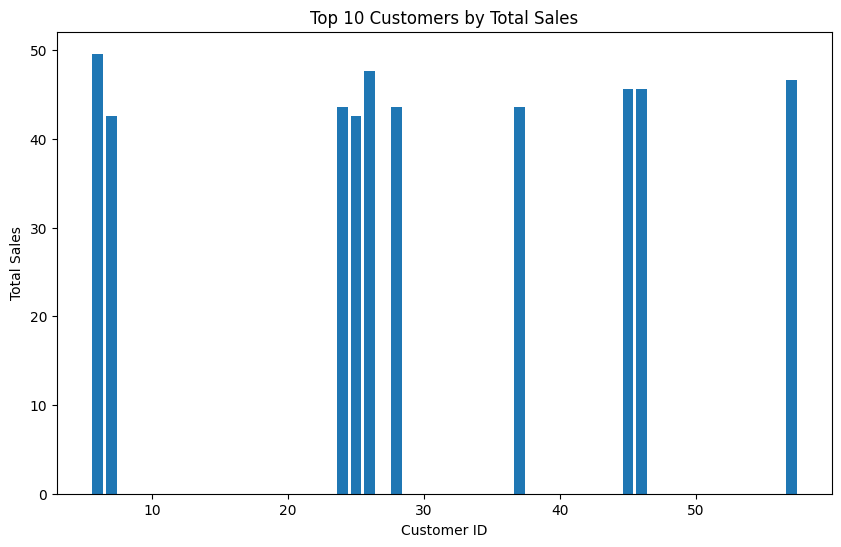

Index(['CustomerId', 'total_sales'], dtype='object')


In [34]:
import matplotlib.pyplot as plt

# Check column names to verify
print(total_sales_df.columns)

# Plot total sales by customer
plt.figure(figsize=(10, 6))
plt.bar(total_sales_df['CustomerId'], total_sales_df['total_sales'])
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Top 10 Customers by Total Sales')
plt.show()
print(total_sales_df.columns)


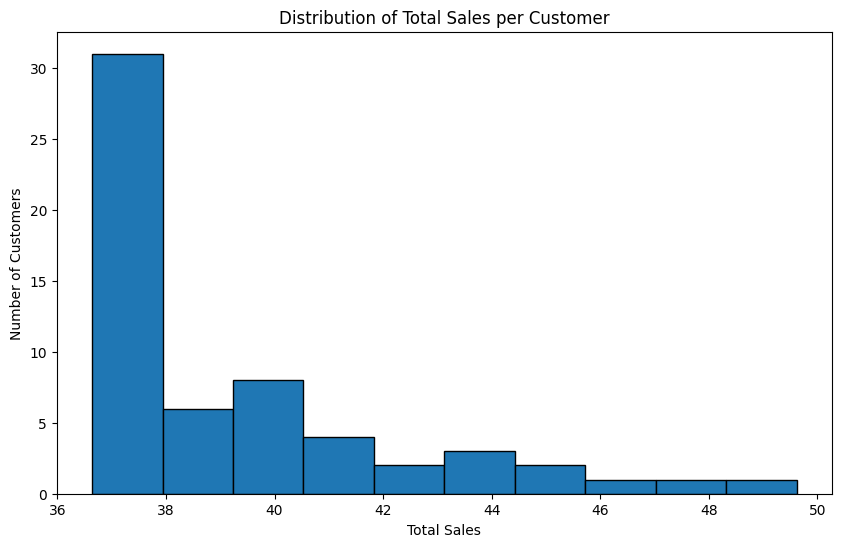

In [35]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("chinook.db")

# Query to get total sales per customer
total_sales_df = pd.read_sql_query(
    "SELECT customerId, SUM(total) AS total_sales FROM invoices GROUP BY customerId",
    conn
)

# Plotting a histogram of total sales per customer
plt.figure(figsize=(10, 6))
plt.hist(total_sales_df['total_sales'], bins=10, edgecolor='black')
plt.xlabel("Total Sales")
plt.ylabel("Number of Customers")
plt.title("Distribution of Total Sales per Customer")
plt.show()

# Close the database connection
conn.close()


# Advanced Data Analysis

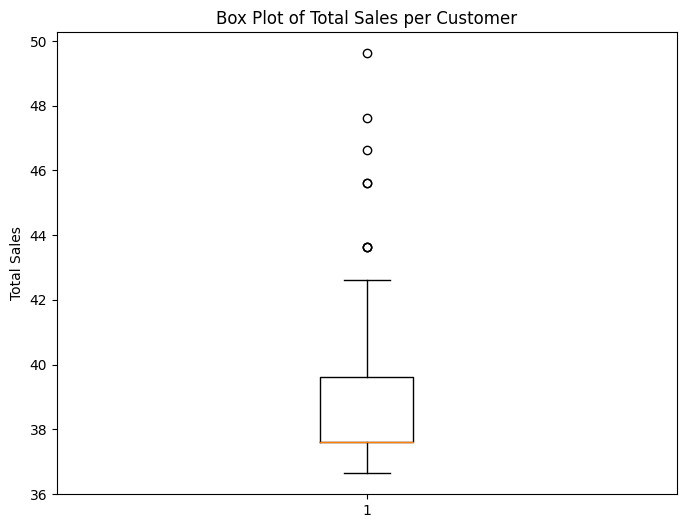

In [36]:
plt.figure(figsize=(8, 6))
plt.boxplot(total_sales_df['total_sales'])
plt.ylabel("Total Sales")
plt.title("Box Plot of Total Sales per Customer")
plt.show()


## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [44]:
# Select customers, their rep, and the rep's supervisor
## uses CTEs
%%script sqlite3 --column --header chinook.db
SELECT customerId, total_sales
FROM (
    SELECT customerId, SUM(total) AS total_sales
    FROM invoices
    GROUP BY customerId
) AS CustomerSales
WHERE total_sales > 100
ORDER BY total_sales DESC;


In [50]:

import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("chinook.db")

# Define the query using a subquery instead of a CTE
query = """
SELECT customerId, total_sales
FROM (
    SELECT customerId, SUM(total) AS total_sales
    FROM invoices
    GROUP BY customerId
) AS CustomerSales
WHERE total_sales > 100
ORDER BY total_sales DESC;
"""

# Execute the query and load the results into a DataFrame
customer_sales_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the result
print(customer_sales_df)


Empty DataFrame
Columns: [customerId, total_sales]
Index: []


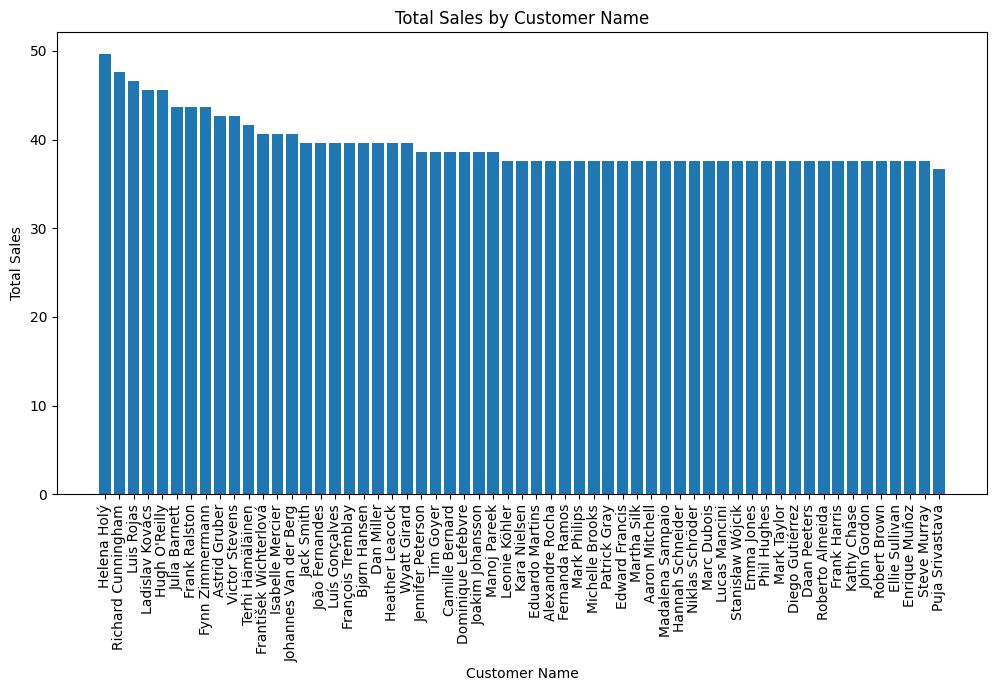

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("chinook.db")

# Query for total sales by customer with join
customer_sales_df = pd.read_sql_query(
    """
    SELECT customers.customerId, customers.firstName || ' ' || customers.lastName AS full_name,
           SUM(invoices.total) AS total_sales
    FROM customers
    JOIN invoices ON customers.customerId = invoices.customerId
    GROUP BY customers.customerId
    ORDER BY total_sales DESC
    """,
    conn
)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.bar(customer_sales_df['full_name'], customer_sales_df['total_sales'])
plt.xticks(rotation=90)
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Total Sales by Customer Name")
plt.show()

# Close the connection after all queries and plots
conn.close()




In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("chinook.db")

# Query to get the number of invoices and total sales per customer
customer_data_df = pd.read_sql_query(
    """
    SELECT customerId, COUNT(invoiceId) AS num_invoices, SUM(total) AS total_sales
    FROM invoices
    GROUP BY customerId
    """,
    conn
)

# Close the connection
conn.close()

# Prepare data for modeling
X = customer_data_df[['num_invoices']]
y = customer_data_df['total_sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
print("Model Score (R^2):", model.score(X_test, y_test))


Model Score (R^2): -0.14963862582837506


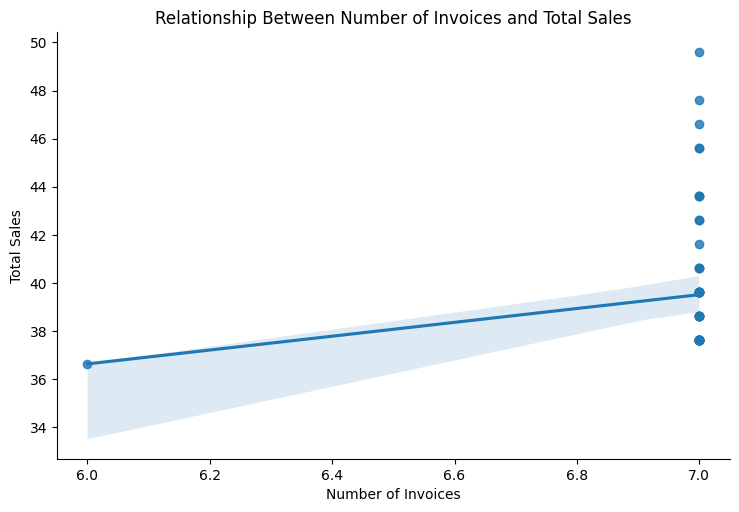

In [180]:
import seaborn as sns

sns.lmplot(x="num_invoices", y="total_sales", data=customer_data_df, aspect=1.5)
plt.xlabel("Number of Invoices")
plt.ylabel("Total Sales")
plt.title("Relationship Between Number of Invoices and Total Sales")
plt.show()



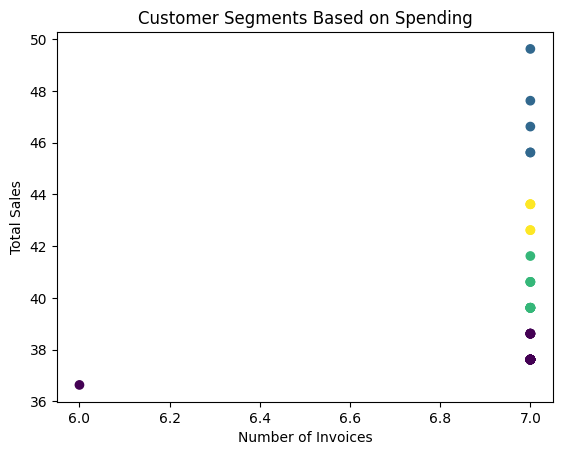

In [173]:
from sklearn.cluster import KMeans

# Perform clustering on total sales data
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data_df['Cluster'] = kmeans.fit_predict(customer_data_df[['total_sales']])

# Plot clusters
plt.scatter(customer_data_df['num_invoices'], customer_data_df['total_sales'], c=customer_data_df['Cluster'])
plt.xlabel("Number of Invoices")
plt.ylabel("Total Sales")
plt.title("Customer Segments Based on Spending")
plt.show()


#**conclusion**

_ The project gave us useful insights into customer behavior, showing our top revenue sources and growth opportunities. Using data-based customer groups and sales predictions can help us target marketing better, use resources efficiently, and retain more customers.

Next steps: Improve prediction models, analyze customer lifetime value, and create automated reports for a clearer view of customer value and trends.